Im vorliegenden Notebook werden drei verschiedene Newton-Cotes-Formeln zur numerischen Integration einer Funktion $f$ über ein Intervall $N=[a, b]$ programmiert. \
Den Newton-Cotes-Formeln liegt die Idee zugrunde, das Intervall $N$, über welches intergriert werden soll, in $k$ äquidistante Bereiche zu unterteilen und durch die $k+1$ Stützstellen, welche diese Teilbereiche begrenzen, ein Polynom $k$-ten Grades zu legen. Dieses Polynom kann im Gegensatz zur Ausgangsfunktion $f$ exakt (numerisch) integriert werden. Durch die Zerlegung von $N$ in $n$ Teilintervalle, in welchen jeweils $f$ wie zuvor durch ein Polynom $k$-ten Grades aproximiert wird, kann das zu berechnende Integral beliebig genau angenähert werden. 

Im folgenden sollen die Funktionen 

$$ f_1 = e^{-2x^2} $$\
$$ f_2 = 0.4\cdot x^6-2\cdot x^5+7\cdot x^4-10\cdot x^3 $$\
$$ f_3 = \frac{1}{0.5\cdot x^2-2\cdot x+3} $$

jeweils durch die Newton-Cotes-Formeln für $k=1$ (Trapez-Regel), $k=2$ (Simpson-Regel) und $k=4$ (Bode-Milner-Regel) numerisch integriert werden. Dabei soll das Integrationsergebnis in Abhängigkeit der Anzahl der Teilintervalle $n$ dargestellt werden und die für die Konvergenz (relative Änderung bei Intervallhalbierung < 0.1%) der Integrationsfunktion benötigte Teilintervallanzahl $n_{min}$ ausgegeben werden. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def trapez(f, a, b, n):
    '''Implementiert Trapez-Regel zur Integration der Funktion f über ein Intervall [a, b] mit n Teilsegmenten und n+1 Stützstellen.'''
    x = np.linspace(a,b,n+1) #n+1 Stützstellen bei n Teilsegmenten
    y = f(x)
    summe = 0
    anzahl = 0
    for i in range(n):
        area = (x[i+1]-x[i])*((y[i+1]-y[i])/2 + y[i]) #Berechnung der (Trapez-) Fläche unter einer Geraden durch die beiden Stützstellen x_i und x_(i+1)
        summe += area
        anzahl += 1
    return summe, anzahl

In [3]:
def simpson(f, a, b, n):
    '''Implementiert Simpson-Regel zur Integration der Funktion f über ein Intervall [a, b] mit n Teilsegmenten und n+1 Stützstellen.
    Für n sollte eine gerade Zahl gewählt werden!'''
    x = np.linspace(a,b,n+1) #n+1 Stützstellen bei n Teilsegmenten
    y = f(x)
    summe = 0
    anzahl = 0
    for i in range(0,n-1,2): #in 2er-Schritten, da die Parabel durch 3 Stützstellen gelegt wird
        area = (x[i+2]-x[i])/6 *(y[i]+ 4*y[i+1] + y[i+2]) #Berechnung der Fläche unter einer Parabel durch die drei Stützstellen x_i, x_(i+1) und x_(i+2)
        summe += area
        anzahl += 1
    return summe, anzahl

In [4]:
def bode(f, a, b, n):
    '''Implementiert Bode-Milne-Regel zur Integration der Funktion f über ein Intervall [a, b] mit n Teilsegmenten und n+1 Stützstellen.
    Für n sollte eine durch 4 teilbare Zahl gewählt werden!'''
    x = np.linspace(a,b,n+1) #n+1 Stützstellen bei n Teilsegmenten
    y = f(x)
    summe = 0
    anzahl = 0
    for i in range(0,n-3,4): #in 4er-Schritten, da das Polynom 4. Grades durch 5 Stützstellen gelegt wird
        area = 2*(x[i+2]-x[i])/90 *(7*y[i] + 32*y[i+1] + 12*y[i+2] + 32*y[i+3] + 7*y[i+4]) #Berechnung der Fläche unter einem Polynom 4. Grades durch die fünf Stützstellen x_i bis x_(i+4)
        summe += area
        anzahl += 1
    return summe, anzahl

In [5]:
def f1(x):
    y_out = np.exp(-2*x**2)
    return y_out

In [6]:
def f2(x):
    y_out = 0.4*x**6-2*x**5+7*x**4-10*x**3
    return y_out

In [7]:
def f3(x):
    y_out = 1/(0.5*x**2-2*x+3)
    return y_out

Anzahl der Durchläufe (n_min) bis Divergenz erreicht ist: 3


<function matplotlib.pyplot.show(*args, **kw)>

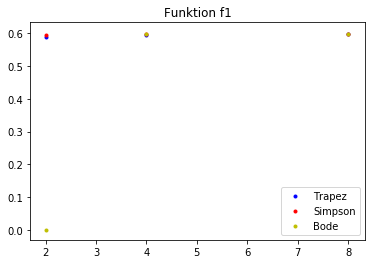

In [8]:
#Plotten der Integrationsergebnisse für f1 nach Trapez-, Simpson- und Bode-Regel
#Ausgabe der benötigten Durchläufe bis zur Erreichung von Divergenz
#aus Gott weiß welchem Grund, bekomme ich Fehlermeldungen bei dem Versuch die Axen zu beschriften
for i in range(1,5):
    trapez_out1, anzahl = trapez(f1,0,1,2**i) #Aufrufen der Trapez-Funktion für f1
    trapez_out_halb1, anzahl = trapez(f1,0,1,2*2**i) #Halbierung der Segmentlänge
    trapdif1 = np.abs(trapez_out1-trapez_out_halb1) 
    simpson_out1, anzahl = simpson(f1,0,1,2**i) #Aufrufen der Simpson-Funktion für f1
    simpson_out_halb1, anzahl2 = simpson(f1,0,1,2*2**i)
    simdif1 = np.abs(simpson_out1-simpson_out_halb1)
    bode_out1, anzahl = bode(f1,0,1,2**i) #Aufrufen der Bode-Funktion für f1
    bode_out_halb1, anzahl2 = bode(f1,0,1,2*2**i)
    bodif1 = np.abs(bode_out1-bode_out_halb1)
    t1 = plt.scatter(2**i, trapez_out1, color = 'b', marker = '.')
    s1 = plt.scatter(2**i, simpson_out1, color = 'r', marker = '.')
    b1 = plt.scatter(2**i, bode_out1, color = 'y', marker = '.')
    if (trapdif1 < 0.001*trapez_out1) and (simdif1 < 0.001*simpson_out1) and (bodif1 < 0.001*bode_out1): #Überprüfung, ob Divergenzkriterium erreicht ist
        print(f'Anzahl der Durchläufe (n_min) bis Divergenz erreicht ist: {i}')
        break
plt.legend((t1, s1, b1), ('Trapez', 'Simpson', 'Bode'), loc = 'best')
plt.title("Funktion f1")
plt.show

Anzahl der Durchläufe (n_min) bis Divergenz erreicht ist: 6


<function matplotlib.pyplot.show(*args, **kw)>

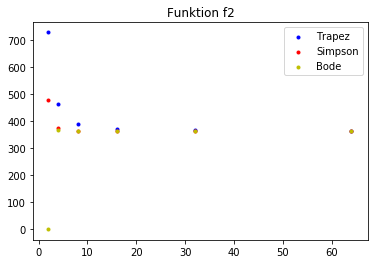

In [9]:
for i in range(1,10):
    trapez_out2, anzahl = trapez(f2,0,4,2**i)
    trapez_out_halb2, anzahl = trapez(f2,0,4,2*2**i)
    trapdif2 = np.abs(trapez_out2-trapez_out_halb2)
    simpson_out2, anzahl = simpson(f2,0,4,2**i)
    simpson_out_halb2, anzahl = simpson(f2,0,4,2*2**i)
    simdif2 = np.abs(simpson_out2-simpson_out_halb2)
    bode_out2, anzahl = bode(f2,0,4,2**i)
    bode_out_halb2, anzahl2 = bode(f2,0,4,2*2**i)
    bodif2 = np.abs(bode_out2-bode_out_halb2)
    t2 = plt.scatter(2**i, trapez_out2, color = 'b', marker = '.')
    s2 = plt.scatter(2**i, simpson_out2, color = 'r', marker = '.')
    b2 = plt.scatter(2**i, bode_out2, color = 'y', marker = '.')
    if (trapdif2 < 0.001*trapez_out2) and (simdif2 < 0.001*simpson_out2) and (bodif2 < 0.001*bode_out2):
        print(f'Anzahl der Durchläufe (n_min) bis Divergenz erreicht ist: {i}')
        break
plt.legend((t2, s2, b2), ('Trapez', 'Simpson', 'Bode'), loc = 'best')
plt.title("Funktion f2")
plt.show

Anzahl der Durchläufe (n_min) bis Divergenz erreicht ist: 5


<function matplotlib.pyplot.show(*args, **kw)>

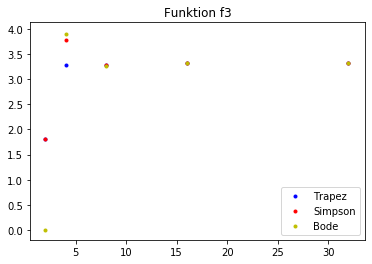

In [10]:
for i in range(1,10):
    trapez_out3, anzahl = trapez(f3,0,10,2**i)
    trapez_out_halb3, anzahl = trapez(f3,0,10,2*2**i)
    trapdif3 = np.abs(trapez_out3-trapez_out_halb3)
    simpson_out3, anzahl = simpson(f3,0,10,2**i)
    simpson_out_halb3, anzahl2 = simpson(f3,0,10,2*2**i)
    simdif3 = np.abs(simpson_out3-simpson_out_halb3)
    bode_out3, anzahl = bode(f3,0,10,2**i)
    bode_out_halb3, anzahl2 = bode(f3,0,10,2*2**i)
    bodif3 = np.abs(bode_out3-bode_out_halb3)
    t3 = plt.scatter(2**i, trapez_out3, color = 'b', marker = '.')
    s3 = plt.scatter(2**i, simpson_out3, color = 'r', marker = '.')
    b3 = plt.scatter(2**i, bode_out3, color = 'y', marker = '.')
    if (trapdif3 < 0.001*trapez_out3) and (simdif3 < 0.001*simpson_out3) and (bodif3 < 0.001*bode_out3):
        print(f'Anzahl der Durchläufe (n_min) bis Divergenz erreicht ist: {i}')
        break
plt.legend((t3, s3, b3), ('Trapez', 'Simpson', 'Bode'), loc = 'best')
plt.title("Funktion f3")
plt.show